In [27]:
import numpy as np
import grpc
import sys
import matplotlib.pyplot as plt
import time
import pandas as pd 
import numpy as np 

sys.path.append("usr/app/grpc_compiled")

import market_data_proto_pb2
import market_data_proto_pb2_grpc


In [3]:
### input Params

channel = grpc.insecure_channel('127.0.0.1:9001')
channel = grpc.insecure_channel('127.0.0.1:9001')
stub = market_data_proto_pb2_grpc.MarketDataServiceStub(channel)


exchange = "BINANCE"
symbol = "BTCUSDT"
duration = "15m"

end_time = int(time.time()*1000)
start_time = end_time -  60*15*45*1000 ;

request  = market_data_proto_pb2.request()
request.exchange  = exchange
request.symbol = symbol
request.duration = duration
request.start_time = start_time
request.end_time = end_time


result = stub.GetKlineData(request )
print (result)

is_success: true
payload {
  open: "31373.10000000"
  high: "31381.03000000"
  low: "31230.13000000"
  close: "31237.25000000"
  start_time: "1654560000000"
  volume: "579.34340000"
}
payload {
  open: "31237.26000000"
  high: "31287.47000000"
  low: "30633.37000000"
  close: "30753.03000000"
  start_time: "1654560900000"
  volume: "3368.73936000"
}
payload {
  open: "30753.02000000"
  high: "30784.32000000"
  low: "30293.73000000"
  close: "30312.73000000"
  start_time: "1654561800000"
  volume: "4399.98370000"
}
payload {
  open: "30312.73000000"
  high: "30419.37000000"
  low: "30131.01000000"
  close: "30197.77000000"
  start_time: "1654562700000"
  volume: "1834.00729000"
}
payload {
  open: "30197.77000000"
  high: "30257.14000000"
  low: "29960.07000000"
  close: "30189.19000000"
  start_time: "1654563600000"
  volume: "2650.41534000"
}
payload {
  open: "30189.18000000"
  high: "30195.08000000"
  low: "29814.92000000"
  close: "29923.78000000"
  start_time: "1654564500000"
  vo

In [22]:
print (type(result.payload))
l = []
for r in result.payload:
    l1 = [r.open , r.high , r.low, r.close , r.start_time , r.volume]
    l.append(l1)
print(len(l))

df =df = pd.DataFrame(l, columns = ['open', 'high', 'low' , 'close' , 'start_time', 'volume'])


<class 'google.protobuf.internal.containers.RepeatedCompositeFieldContainer'>
45


In [23]:
df["open" ]  =  pd.to_numeric(df["open" ], downcast="float")
df["close" ]  =  pd.to_numeric(df["close" ], downcast="float")
df["start_time" ]  =  pd.to_numeric(df["start_time" ], downcast="float")

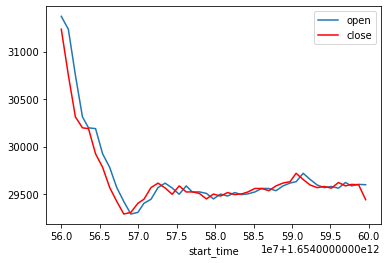

In [30]:
ax = plt.gca()
df.plot(kind='line',y='open',x='start_time',ax=ax)
df.plot(kind='line',y='close',x='start_time', color='red', ax=ax)
plt.show()